# Alpha factors

That core of __CAPM__ is distinguishing between stock returns that derive from broad market movements and those that do not.

For example, if we consider __ExxonMobil__ (ticker symbol XOM) and the index __S&P 500__ (ticker symbol SPX) we can fit a regression line through the scatter plot of the daily returns of XOM and SPX to find the linear equation that best captures its pattern, i.e.  

$Return (XOM) = beta*Return(SPX)+alpha$ 


where alpha is the Y-intercept of the regression line, and beta is its slope.

We can interpret these __alphas__ and __betas__ as follows:

* __Alpha__ is the systematic difference in performance (return) of a stock over and above the market. Positive alpha could come from superior management, production technology, or product design; or from having a dominant position in the company’s market that provides it pricing power (the ability to raise prices without losing many customers). 
* __Beta__ represents the stock’s price volatility relative to the overall market. Simply put, a stock with a beta of, say, 1.5 will rise on average 1.5 times as much, and fall 1.5 times as much, as the overall market, in percentage terms. Small, speculative companies usually have betas well above 1.0, while large companies with very stable earnings usually have betas well under 1.0. The market’s beta is by definition 1.0.
    

Same __return decomposition__ can be applied to __portfolios__ instead of a single stock and __fund manager__ can derive return from __beta__ and __alpha__. When returns are based primarily on an __upward general market__ we call this __buying beta__. On the other hand, returns resulting from __investment skill__ are known as __seeking alpha__. Hence, __CAPM__ allows the most basic disaggregation of an investment’s performance into two parts: 

1. based on __market return__ which could be achieved simply by buying an index (__beta__)
2. based on __market independent factors__ (__alpha__)

## Basic Hedge Fund Strategies

Hedge funds are so called because the first hedge fund, __Albert Winslow Jones__’ fund formed in __1949__, strove for absolute __positive returns__ through __hedging__, i.e. making contrary bets that would pay off if their main bet failed. These hedges would at a minimum reduce losses, and in the best case could produce absolute positive returns (i.e., returns above zero even if the general market direction was downward). In exchange, these hedges posed a drag on returns when the market headed upward. 

Typically, hedge funds are looking for portfolio allocation with 

* __Low Exposure to Market Risk (market beta between -0.3 and +0.3)__: this is often referred to as "_beta neutral_" or "_dollar neutral_". If strategy is correlated with the rest of the stock market, the strategy isn't providing any quality different from buying a market index. Market exposure can be measured by calculating portfolio's beta to the S&P 500. 
* __Positive alpha__: the higher the better! 

## Alphalens

[Alphalens](https://github.com/quantopian/alphalens) is a Python Library for performance analysis of predictive (alpha) stock factors. Here we evaluate two possible factors: 

* __company revenue_growth__
* __company operation_margin__

# revenue_growth

In [3]:
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline 
from quantopian.pipeline.filters.morningstar import Q1500US
from quantopian.pipeline.data.sentdex import sentiment 
from quantopian.pipeline.data.morningstar import asset_classification
from quantopian.pipeline.data.morningstar import operation_ratios
import alphalens

In [2]:
def make_pipeline():
    testing_factor = operation_ratios.revenue_growth.latest
    universe = (Q1500US() & testing_factor.notnull())
    testing_factor = testing_factor.rank(mask=universe,method='average')
    pipe = Pipeline(columns={'testing_factor':testing_factor},screen=universe)
    return pipe

In [3]:
result = run_pipeline(make_pipeline(),start_date='2015-01-01',end_date='2016-01-01')

In [4]:
type(result)

<class 'pandas.core.frame.DataFrame'>

In [5]:
result.head()

testing_factor
2015-01-02 00:00:00+00:00 Equity(2 [ARNC])            759.0
                          Equity(24 [AAPL])           949.0
                          Equity(41 [ARCB])          1006.0
                          Equity(62 [ABT])            601.0
                          Equity(67 [ADSK])           914.0

In [6]:
assets = result.index.levels[1].unique()
pricing = get_pricing(assets,start_date='2015-01-01',end_date='2016-01-01')

In [7]:
len(assets)

1733

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: DeprecationWarning: This function is deprecated and will be removed in the future. Please use the new API instead.


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,1.0,754.0,373.679827,215.591424,164619,50.015799
2,739.0,1500.0,1120.173717,215.298930,164515,49.984201


Returns Analysis


,3,10,30
Ann. alpha,0.033,0.034,0.045
beta,-0.006,-0.022,-0.016
Mean Period Wise Return Top Quantile (bps),2.442,8.906,39.420
Mean Period Wise Return Bottom Quantile (bps),-2.440,-8.901,-39.395
Mean Period Wise Spread (bps),1.615,1.765,2.622


Information Analysis


,3,10,30
IC Mean,0.021,0.027,0.040
IC Std.,0.106,0.110,0.108
t-stat(IC),3.007,3.691,5.554
p-value(IC),0.003,0.000,0.000
IC Skew,-0.420,-0.706,-0.418
IC Kurtosis,0.174,1.024,-0.476
Ann. IR,3.204,3.932,5.917


Turnover Analysis


,3,10,30
Quantile 1 Mean Turnover,0.035,0.089,0.177
Quantile 2 Mean Turnover,0.036,0.090,0.180


,3,10,30
Mean Factor Rank Autocorrelation,0.953,0.88,0.761


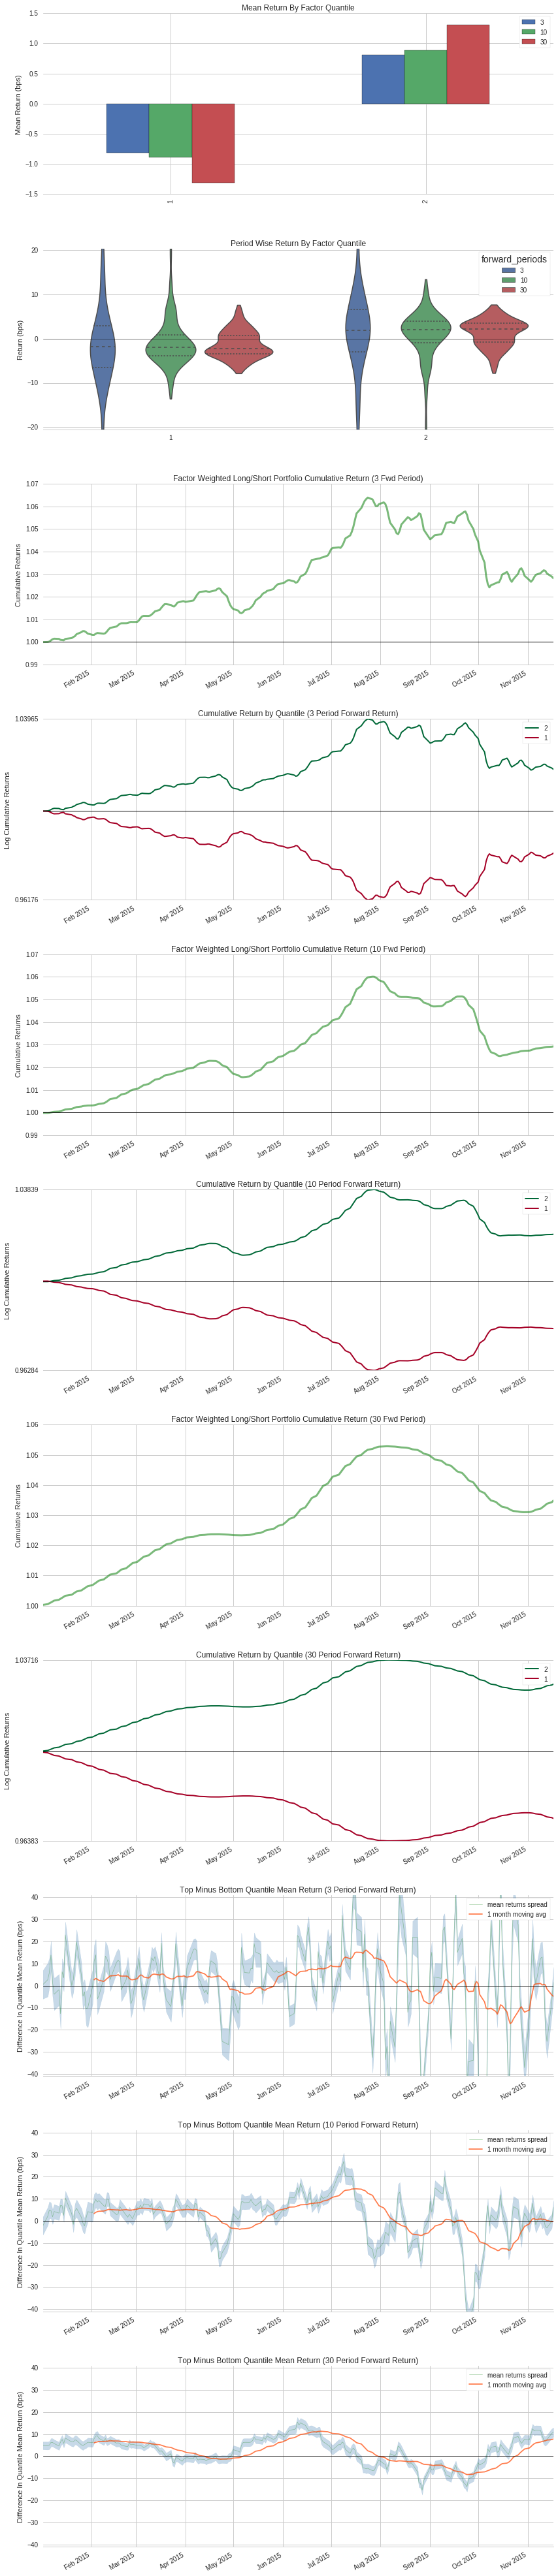

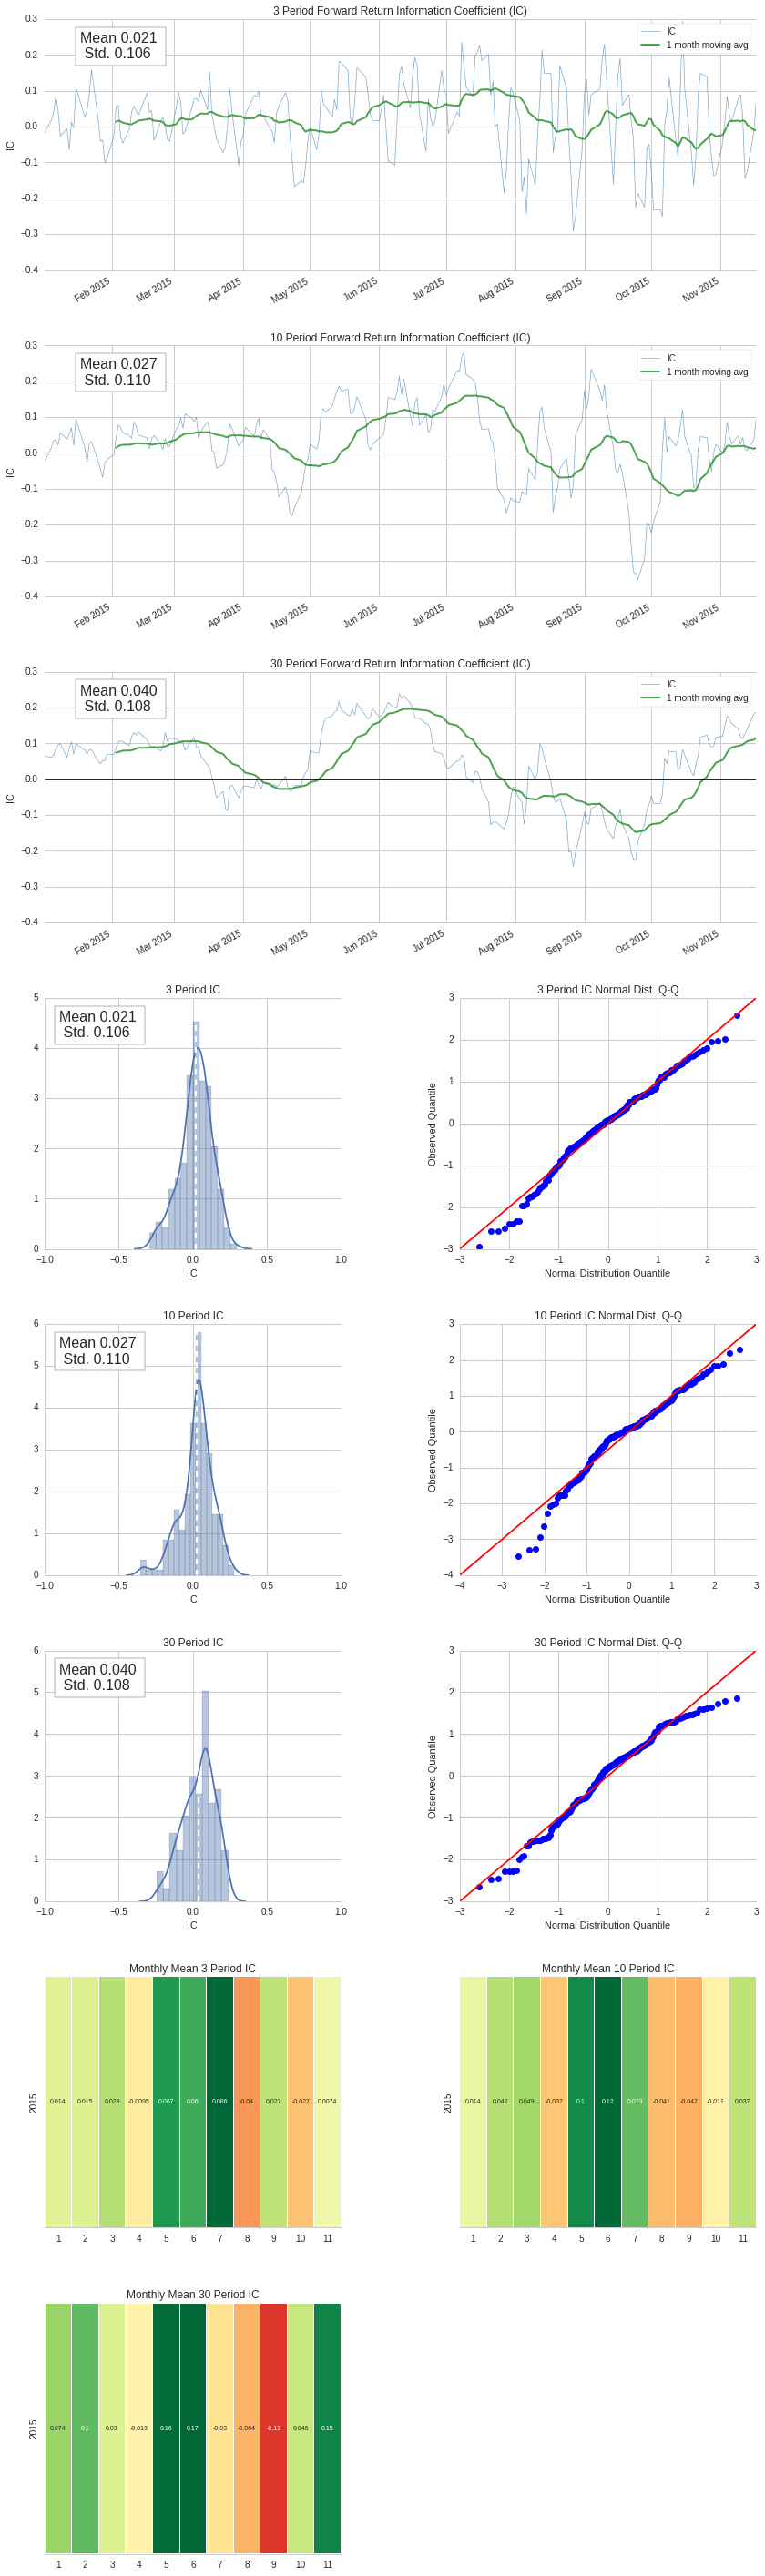

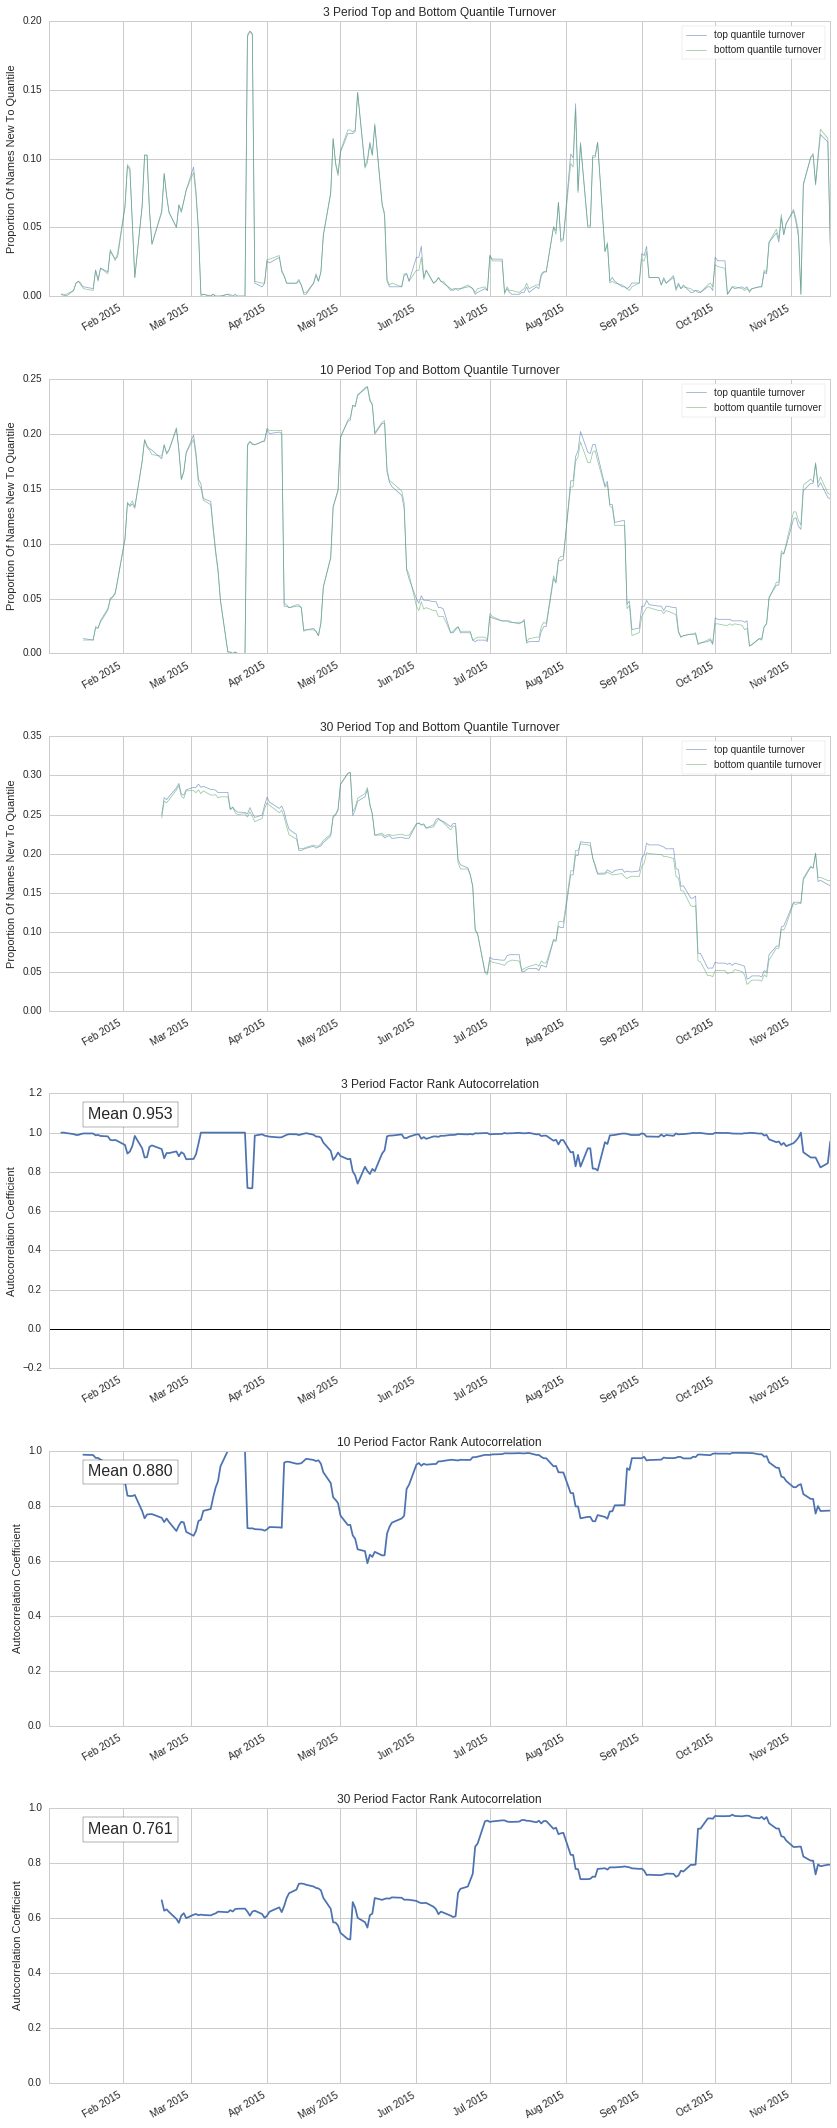

In [8]:
alphalens.tears.create_factor_tear_sheet(factor=result['testing_factor'], 
                                         prices=pricing['open_price'], 
                                         quantiles=2,
                                         periods=(3,10,30))

# operation_margin

In [1]:
def make_pipeline():
    testing_factor = operation_ratios.operation_margin.latest
    universe = (Q1500US() & testing_factor.notnull())
    testing_factor = testing_factor.rank(mask=universe,method='average')
    pipe = Pipeline(columns={'testing_factor':testing_factor},screen=universe)
    return pipe

In [4]:
result = run_pipeline(make_pipeline(),start_date='2015-01-01',end_date='2016-01-01')

In [5]:
assets = result.index.levels[1].unique()
pricing = get_pricing(assets,start_date='2015-01-01',end_date='2016-01-01')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: DeprecationWarning: This function is deprecated and will be removed in the future. Please use the new API instead.


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,1.0,751.0,372.591408,214.565953,163777,50.01588
2,735.0,1495.0,1114.761393,214.002624,163673,49.98412


Returns Analysis


,3,10,30
Ann. alpha,0.049,0.050,0.046
beta,-0.181,-0.173,-0.183
Mean Period Wise Return Top Quantile (bps),4.893,14.998,47.464
Mean Period Wise Return Bottom Quantile (bps),-4.890,-14.989,-47.434
Mean Period Wise Spread (bps),3.264,2.999,3.165


Information Analysis


,3,10,30
IC Mean,0.022,0.029,0.054
IC Std.,0.114,0.114,0.098
t-stat(IC),2.879,3.801,8.193
p-value(IC),0.004,0.000,0.000
IC Skew,0.232,0.032,0.101
IC Kurtosis,-0.222,-0.364,-0.891
Ann. IR,3.067,4.050,8.729


Turnover Analysis


,3,10,30
Quantile 1 Mean Turnover,0.016,0.045,0.117
Quantile 2 Mean Turnover,0.014,0.041,0.106


,3,10,30
Mean Factor Rank Autocorrelation,0.986,0.956,0.873


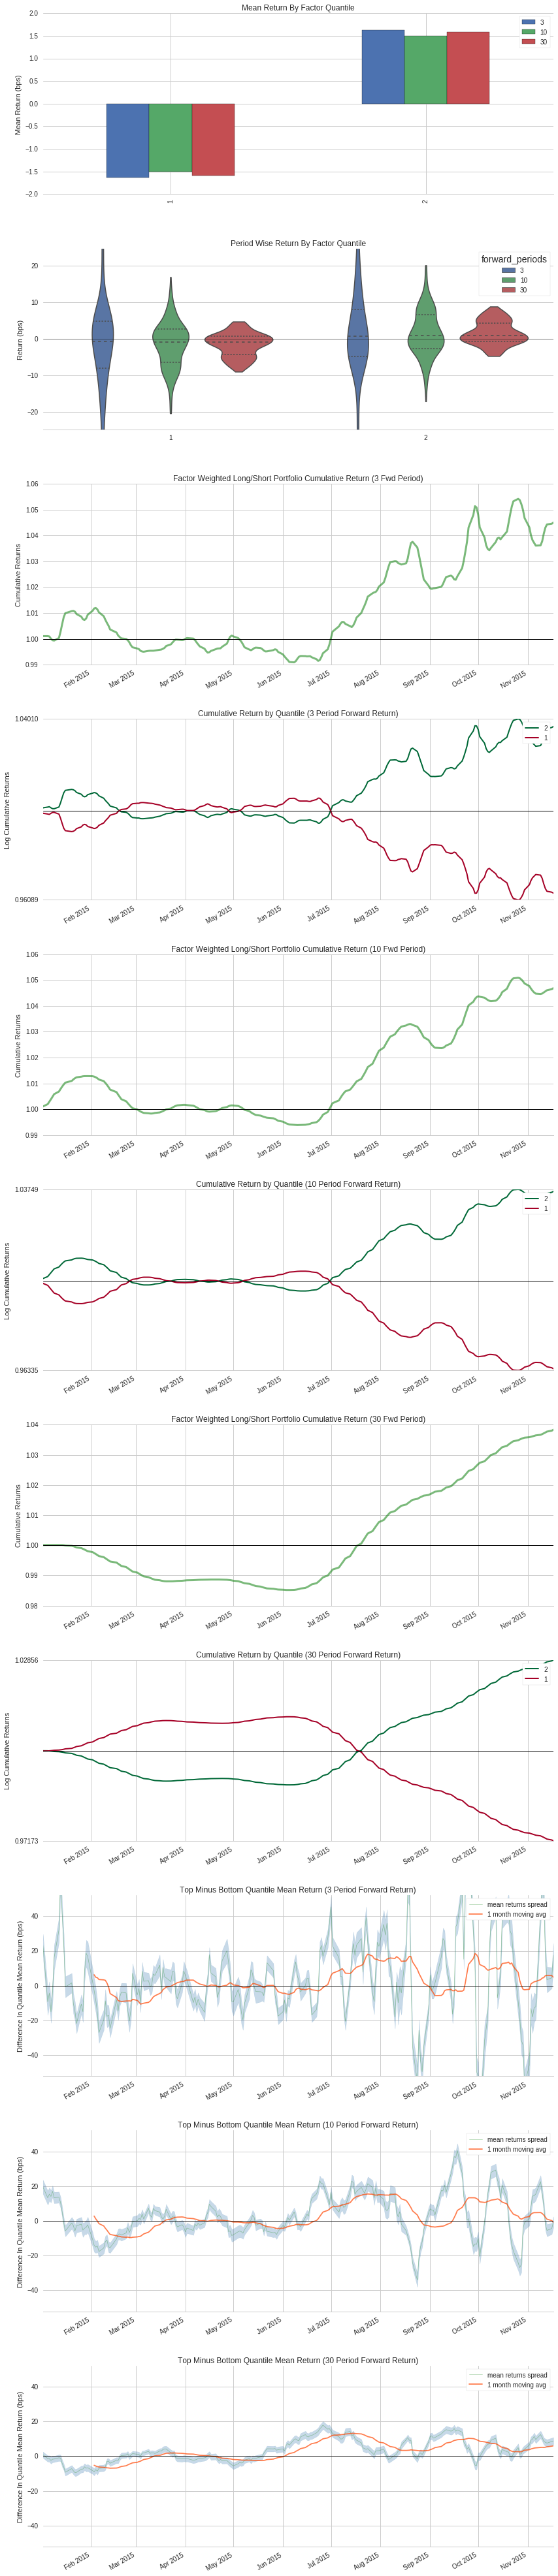

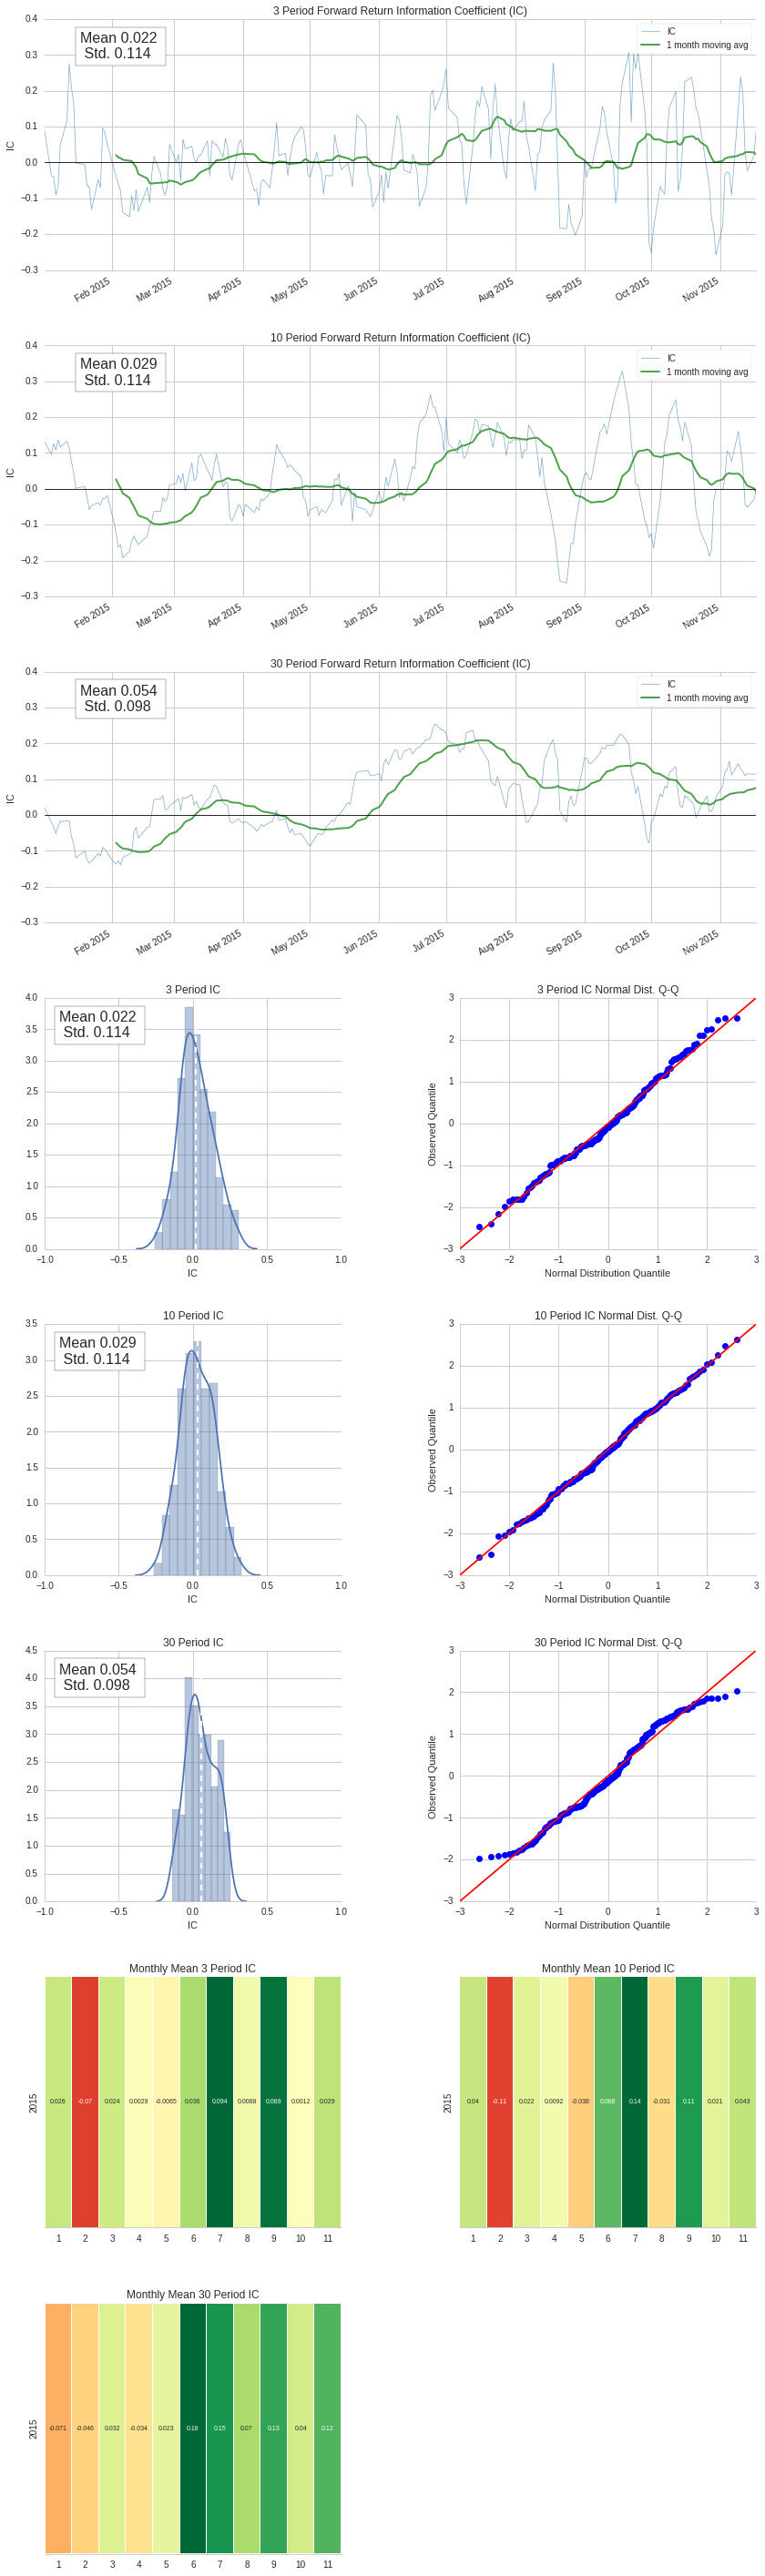

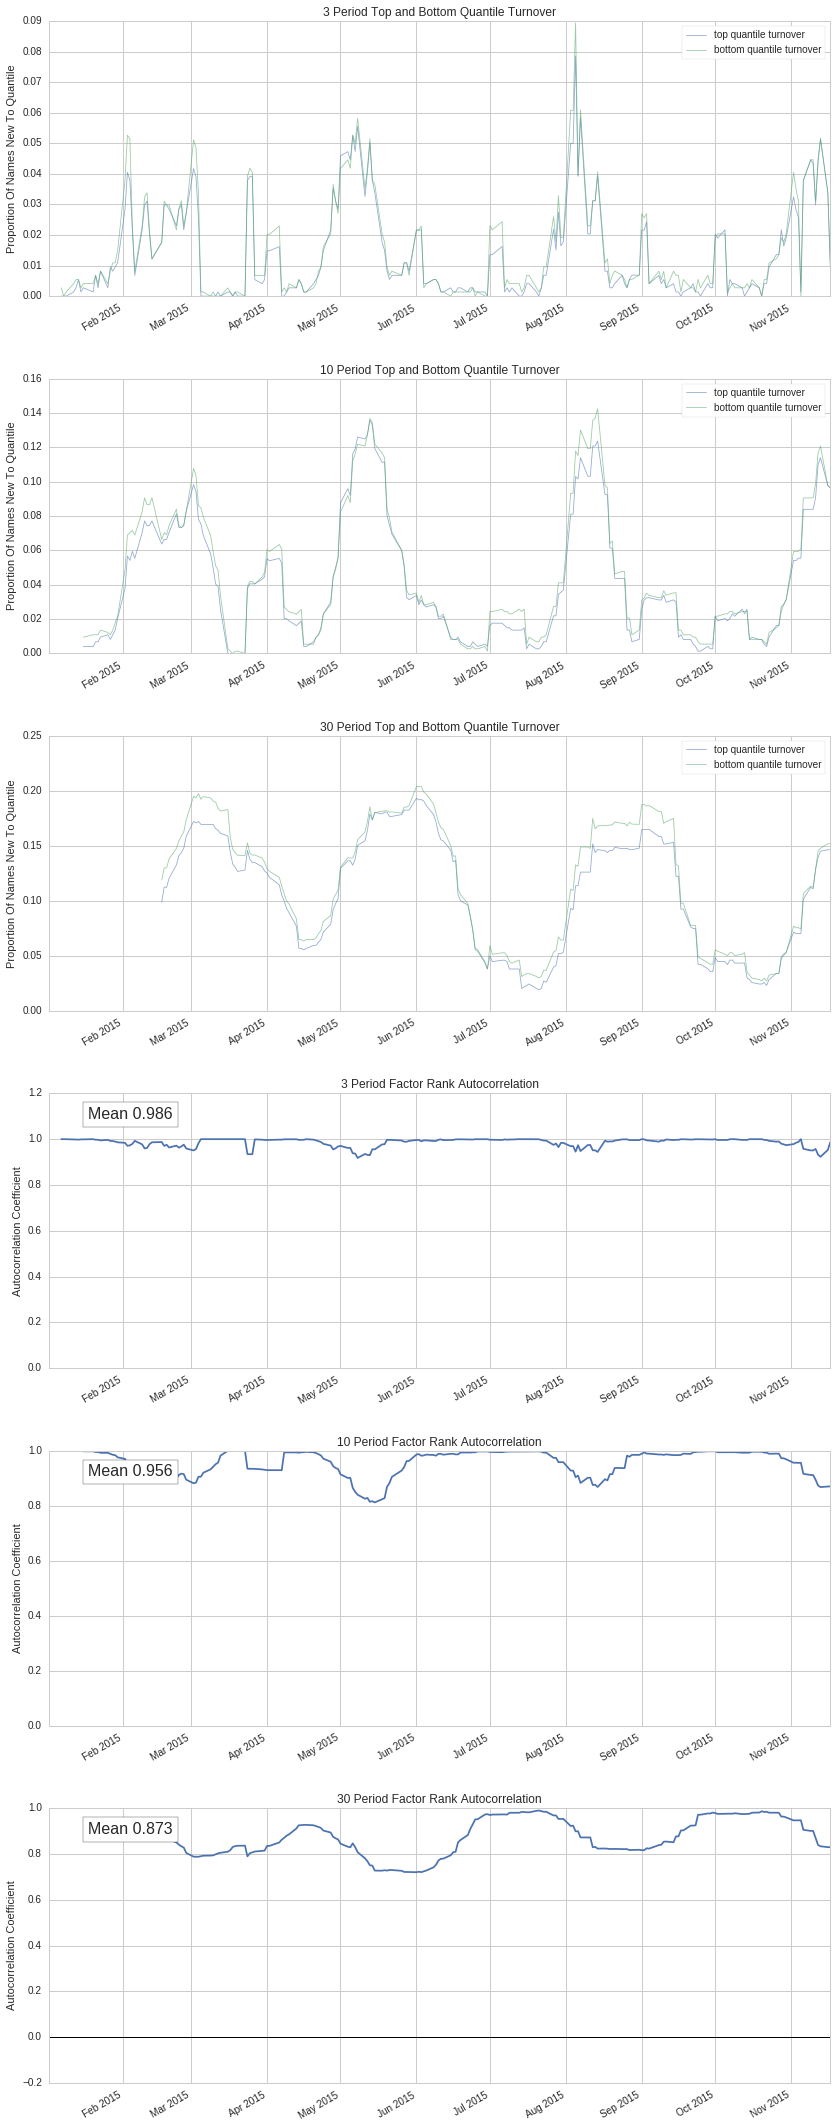

In [6]:
alphalens.tears.create_factor_tear_sheet(factor=result['testing_factor'], 
                                         prices=pricing['open_price'], 
                                         quantiles=2,
                                         periods=(3,10,30))